<a href="https://colab.research.google.com/github/tharushaliyanagama/OralCancerEarlyDetection-DSGP/blob/Prediction-of-textual-data-I/Text_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1.Data Preprocessing**

**Import Libraries**

In [1]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt


**Load and Inspect the Dataset**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
data = pd.read_csv('/content/drive/MyDrive/DSGP/Siyumi/DatasetNew.csv')

In [8]:
#Display information
print("Dataset Info:")
print(data.info())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2237 entries, 0 to 2236
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   public_id             2237 non-null   int64  
 1   lesion_id             2237 non-null   int64  
 2   patient_id            2237 non-null   int64  
 3   localization          2237 non-null   object 
 4   larger_size           2237 non-null   float64
 5   tobacco_use           2237 non-null   object 
 6   alcohol_consumption   2237 non-null   object 
 7   sun_exposure          2237 non-null   object 
 8   gender                2237 non-null   object 
 9   skin_color            2237 non-null   object 
 10  age_group             2237 non-null   int64  
 11  symptoms              1773 non-null   object 
 12  cancer_or_non_cancer  2237 non-null   object 
dtypes: float64(1), int64(4), object(8)
memory usage: 227.3+ KB
None


In [9]:
#Load 5 rows
print("\nFirst 5 rows:")
print(data.head())


First 5 rows:
   public_id  lesion_id  patient_id localization  larger_size tobacco_use  \
0          0         50          48       Tongue          2.0         Yes   
1          1         50          48       Tongue          2.0         Yes   
2          2         41          39       Tongue          2.5         Yes   
3          3         41          39       Tongue          2.5         Yes   
4          4         87          81          Lip          1.5      Former   

  alcohol_consumption sun_exposure gender skin_color  age_group  \
0                  No           No      M      Black          2   
1                  No           No      M      Black          2   
2              Former          Yes      M      White          1   
3              Former          Yes      M      White          1   
4                 Yes          Yes      F      White          2   

                                            symptoms cancer_or_non_cancer  
0  Difficulty swallowing, Tongue pain, Chro

In [5]:
# Check for missing values
print("\nChecking for missing values:")
print(data.isnull().sum())


Checking for missing values:
public_id                 0
lesion_id                 0
patient_id                0
localization              0
larger_size               0
tobacco_use               0
alcohol_consumption       0
sun_exposure              0
gender                    0
skin_color                0
age_group                 0
symptoms                464
cancer_or_non_cancer      0
dtype: int64


In [10]:
# Handle missing values
for column in data.columns:
    if data[column].dtype == 'object':  # Categorical features
        data[column].fillna('Unknown', inplace=True)
    else:  # Numerical features
        data[column].fillna(data[column].median(), inplace=True)

<ipython-input-10-fd35bf2c9d52>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[column].fillna(data[column].median(), inplace=True)
<ipython-input-10-fd35bf2c9d52>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', 

In [11]:
print("\nMissing values handled:")
print(data.isnull().sum())


Missing values handled:
public_id               0
lesion_id               0
patient_id              0
localization            0
larger_size             0
tobacco_use             0
alcohol_consumption     0
sun_exposure            0
gender                  0
skin_color              0
age_group               0
symptoms                0
cancer_or_non_cancer    0
dtype: int64


In [6]:
# Check for duplicate rows
print(f"\nNumber of duplicate rows before removal: {data.duplicated().sum()}")


Number of duplicate rows before removal: 0


In [12]:
# Encode categorical variables
categorical_columns = data.select_dtypes(include=['object']).columns
for column in categorical_columns:
    if column != 'cancer_or_non_cancer':
        le = LabelEncoder()
        data[column] = le.fit_transform(data[column])

In [13]:
# Map target variable to binary
data['cancer_or_non_cancer'] = data['cancer_or_non_cancer'].map({'Cancer': 1, 'Non-Cancer': 0})

**Correlation Analysis**

In [14]:
print("\nCorrelation Analysis:")
correlation_matrix = data.corr()
correlation_with_target = correlation_matrix['cancer_or_non_cancer'].sort_values(ascending=False)
print(correlation_with_target)


Correlation Analysis:
cancer_or_non_cancer    1.000000
localization            0.068836
skin_color              0.017312
gender                  0.014332
sun_exposure            0.009561
alcohol_consumption     0.008785
tobacco_use            -0.005747
larger_size            -0.010883
lesion_id              -0.016488
symptoms               -0.017392
age_group              -0.041309
patient_id             -0.043370
public_id              -0.174845
Name: cancer_or_non_cancer, dtype: float64


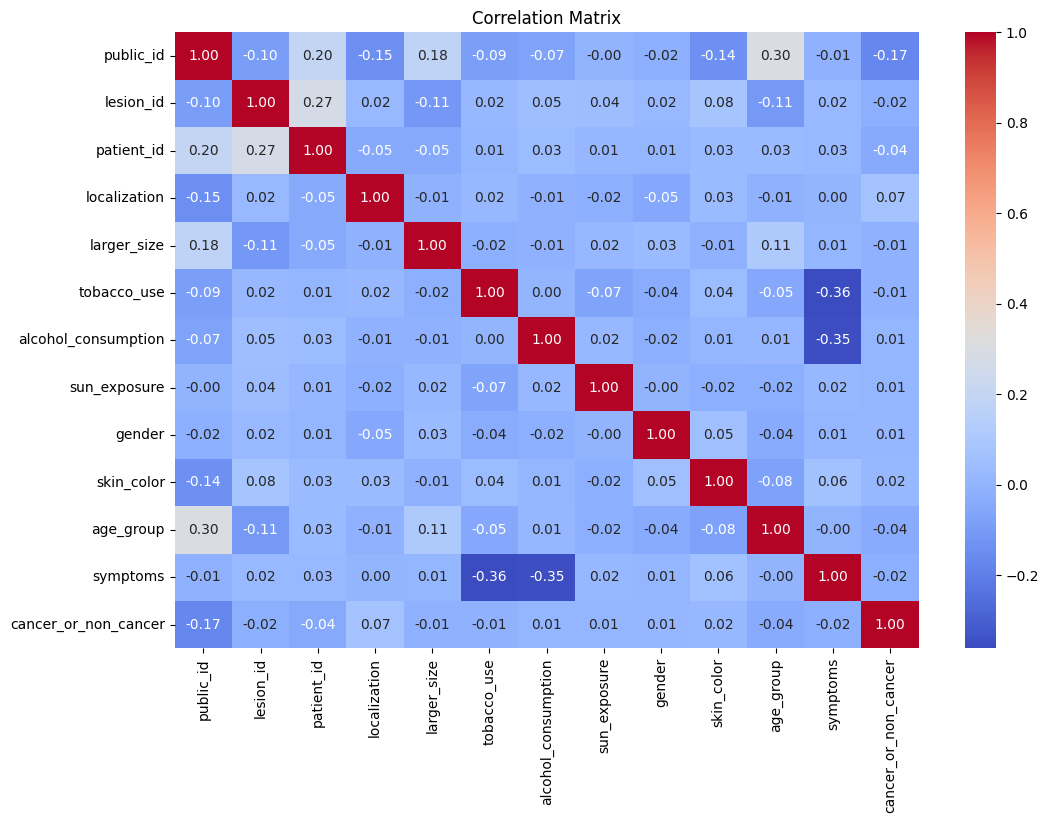

In [15]:
# Visualize correlation with a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

**Select only the relevant columns**

In [ ]:
wanted_columns = [
    'tobacco_use', 'alcohol_consumption', 'sun_exposure',
    'gender', 'skin_color', 'age_group', 'larger_size','localization','dysplasia_severity',
    'diagnosis']
data = data[wanted_columns]

**Display the first few rows of the cleaned dataset**

In [ ]:
print("Cleaned Dataset Preview:")
print(data.head())

Cleaned Dataset Preview:
  tobacco_use alcohol_consumption sun_exposure gender skin_color  age_group  \
0         Yes                  No           No      M      Black          2   
1         Yes                  No           No      M      Black          2   
2         Yes              Former          Yes      M      White          1   
3         Yes              Former          Yes      M      White          1   
4      Former                 Yes          Yes      F      White          2   

   larger_size localization dysplasia_severity diagnosis  
0          2.0       Tongue                NaN      OSCC  
1          2.0       Tongue                NaN      OSCC  
2          2.5       Tongue                NaN      OSCC  
3          2.5       Tongue                NaN      OSCC  
4          1.5          Lip                NaN      OSCC  


In [ ]:
data

,tobacco_use,alcohol_consumption,sun_exposure,gender,skin_color,age_group,larger_size,localization,dysplasia_severity,diagnosis
0,Yes,No,No,M,Black,2,2.0,Tongue,NaN,OSCC
1,Yes,No,No,M,Black,2,2.0,Tongue,NaN,OSCC
2,Yes,Former,Yes,M,White,1,2.5,Tongue,NaN,OSCC
3,Yes,Former,Yes,M,White,1,2.5,Tongue,NaN,OSCC
4,Former,Yes,Yes,F,White,2,1.5,Lip,NaN,OSCC
...,...,...,...,...,...,...,...,...,...,...
2232,Former,Former,Yes,F,Asian,3,1.8,Gingiva,Mild,Precancerous
2233,Yes,Yes,No,M,Hispanic,5,2.1,Buccal mucosa,Severe,OSCC
2234,No,No,Yes,F,Brown,3,1.8,Cheek,Moderate,OSCC
2235,No,No,No,M,Brown,3,2.3,Floor of mouth,Severe,Benign


**Handle Missing Values**

In [ ]:
# Handle missing values (example: fill with mode)
data['dysplasia_severity'] = data['dysplasia_severity'].fillna(data['dysplasia_severity'].mode()[0])

In [ ]:
# Fill missing values in 'lesion_size' if any (e.g., with median or mode)
data['larger_size'] = data['larger_size'].fillna(data['larger_size'].median())

**Encode Categorical Variables (Including Lesion Location)**

In [ ]:
# Encode categorical columns to numerical values
label_encoders = {}
categorical_columns = ['tobacco_use', 'alcohol_consumption', 'sun_exposure',
                       'gender', 'skin_color', 'localization']

for column in categorical_columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le  # Store encoders for future use

**One-hot encode categorical variables**

In [ ]:
categorical_columns = ['tobacco_use', 'alcohol_consumption', 'sun_exposure', 'gender', 'skin_color']
data = pd.get_dummies(data, columns=categorical_columns, drop_first=True)


**Calculate correlation matrix**

In [ ]:
# Convert 'localization' to numeric using a mapping for ordinal values
if data['localization'].dtype == object:  # Check if the column is of object type
    # Define the mapping
    localization_mapping = {'Mild': 0, 'Moderate': 1, 'Severe': 2}  # Adjust mapping if needed

    # Map the values in the column
    data['localization'] = data['localization'].map(localization_mapping)

    # Check for any unmapped or NaN values after mapping
    data['localization'] = data['localization'].fillna(-1)  # Replace NaN with -1 or another value if necessary

# Check if all columns are numeric before calculating correlation
numeric_data = data.select_dtypes(include=['number'])

# Calculate correlation matrix
correlation_matrix = numeric_data.corr()


**Plot heatmap**

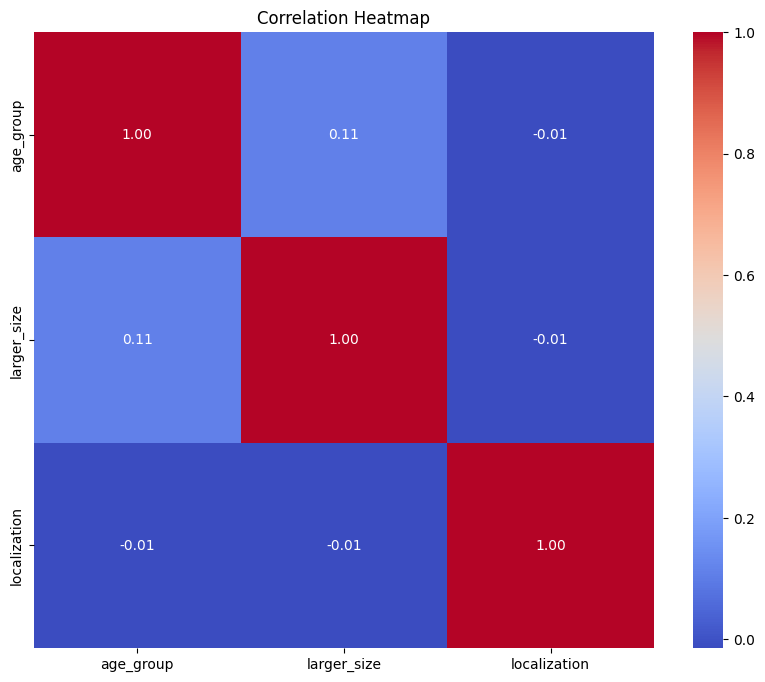

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()

**Select Features and Target Variable**

In [ ]:
# Define features and target
features = [col for col in [
    'tobacco_use_1', 'alcohol_consumption_1', 'sun_exposure_1',
    'gender_1', 'skin_color_1', 'age_group', 'localization', 'larger_size'
] if col in data.columns]  # Only include columns that exist in the DataFrame

X = data[features]
y = data['diagnosis'].apply(lambda x: 1 if x == 'OSCC' else 0)

print("Features selected successfully!")
print("Feature columns:", features)

Features selected successfully!
Feature columns: ['tobacco_use_1', 'alcohol_consumption_1', 'sun_exposure_1', 'gender_1', 'skin_color_1', 'age_group', 'localization', 'larger_size']


**Split Data into Training and Testing Sets**

In [ ]:
# Split the dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Feature Scaling**

In [ ]:
# Apply feature scaling to standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)  # Fit and transform the training set
X_test = scaler.transform(X_test)        # Transform the test set (using the same scaler)

**Check the Preprocessed Data**

In [ ]:
# Display the shapes of the processed datasets
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

# Optionally, display a sample of the preprocessed data
print("Sample preprocessed X_train:\n", X_train[:5])

X_train shape: (1789, 8)
X_test shape: (448, 8)
y_train shape: (1789,)
y_test shape: (448,)
Sample preprocessed X_train:
 [[-0.6917459   1.43279483 -0.24203281 -1.02662601  1.79702933  0.43076119
   0.48292889  1.87210902]
 [-0.6917459  -0.69793663 -0.24203281  0.97406455 -0.55647394 -0.31525214
   0.48292889  1.45992478]
 [ 1.44561752 -0.69793663 -0.24203281 -1.02662601 -0.55647394  0.43076119
   0.0831326   0.6355563 ]
 [ 1.44561752  1.43279483 -0.24203281 -1.02662601 -0.55647394 -0.31525214
   1.28252147  1.6660169 ]
 [-0.6917459   1.43279483 -0.24203281  0.97406455 -0.55647394 -0.31525214
   1.28252147 -0.3949043 ]]


**Exploratory Data Analysis**

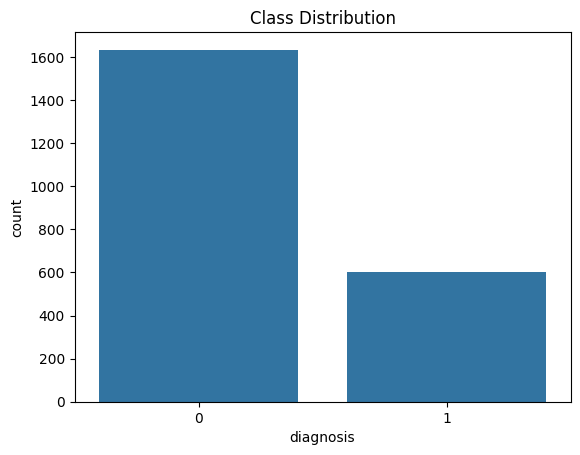

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x=y)
plt.title("Class Distribution")
plt.show()

## **Model Training**
**1. Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Train Logistic Regression model
log_reg_model = LogisticRegression(random_state=42)
log_reg_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_log_reg = log_reg_model.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log_reg))
print("Classification Report:\n", classification_report(y_test, y_pred_log_reg))

Logistic Regression Accuracy: 0.7232142857142857
Classification Report:
               precision    recall  f1-score   support

           0       0.72      1.00      0.84       324
           1       0.00      0.00      0.00       124

    accuracy                           0.72       448
   macro avg       0.36      0.50      0.42       448
weighted avg       0.52      0.72      0.61       448



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


**2. Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Train Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_dt = dt_model.predict(X_test)
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Classification Report:\n", classification_report(y_test, y_pred_dt))

Decision Tree Accuracy: 0.6517857142857143
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.74      0.76       324
           1       0.38      0.41      0.40       124

    accuracy                           0.65       448
   macro avg       0.57      0.58      0.58       448
weighted avg       0.66      0.65      0.66       448



**3. Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_rf = rf_model.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.6919642857142857
Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.83      0.80       324
           1       0.43      0.32      0.37       124

    accuracy                           0.69       448
   macro avg       0.59      0.58      0.58       448
weighted avg       0.67      0.69      0.68       448

